# Tugas
- Gunakan data 'Mall_Customers.csv'
- Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
- Buatlah model K-Means dengan mempertimbangkan jumlah yang terbaik.
- Buatlah implementasi model SOM untuk segmentasi citra lain

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### 1. Gunakan data 'Mall_Customers.csv'

In [2]:
# import data
df = pd.read_csv('../data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Check for missing values
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [23]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [24]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


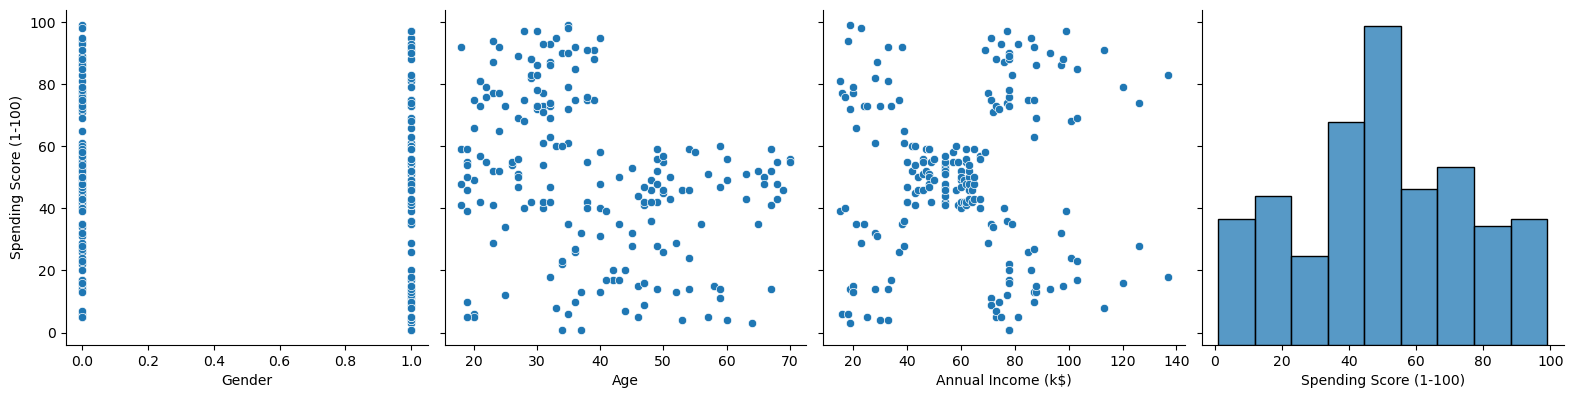

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')
plt.show()


Terlihat pada diatas pada korelasi Spending score dan annual income mendapati pola clustering. Sehingga kita akan memakai 2 fitur yaitu Annual Income dan Spending Score.

Sebenarnya pasangan fitur Age dan Spending Score juga dapat dijadikan fitur untuk clustering.

### 3. Buatlah model K-Means dengan mempertimbangkan jumlah yang terbaik
- Feature : [Annual Income, Spending Score]

In [104]:
# Memisahkan data fitur
df_train = df[['Annual Income (k$)', 'Spending Score (1-100)']] 

In [105]:
print(df_train)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Text(0, 0.5, 'Spending Score')

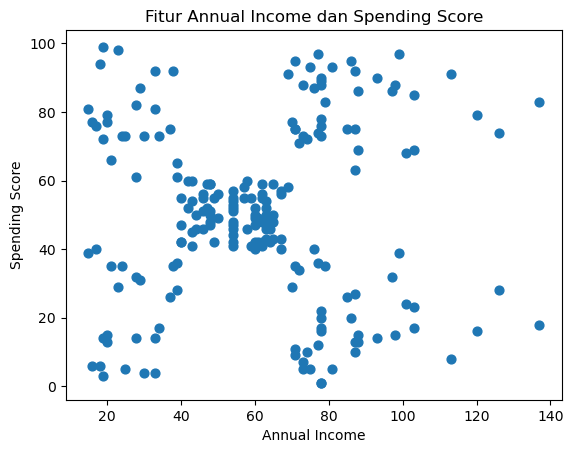

In [118]:
# Visualisasi data fitur
plt.title("Fitur Annual Income dan Spending Score")
plt.scatter(df_train.iloc[:,0], df_train.iloc[:,1], s = 40)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

**Train Model**

In [119]:
# Train k-means model
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2,n_init=10)

y_kmeans = cl_kmeans.fit_predict(df_train)

In [120]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 181363.59595959596


**Optimalisasi K menggunakan Elbow**

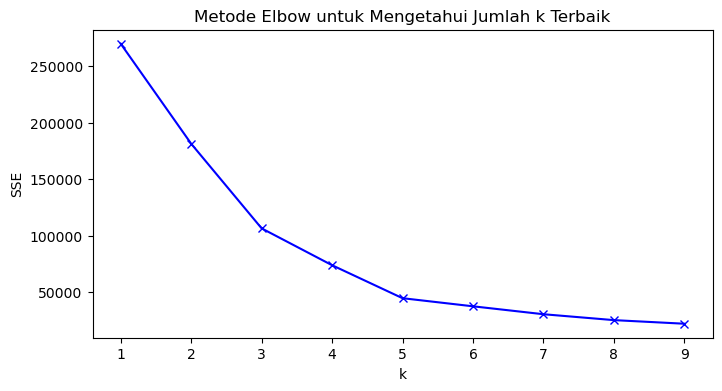

In [123]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k,n_init=10)
 kmeanModel.fit(df_train)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Dengan menggunakaan metode elbow mendapatkan k=5 untuk k yang paling optimal

In [124]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.2800000001
k=2; SSE=181363.59595959596
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948834
k=5; SSE=44448.45544793371
k=6; SSE=37265.86520484347
k=7; SSE=30241.343617936585
k=8; SSE=25018.78161341407
k=9; SSE=21826.936303231654


**Optimalisasi K menggunakan Silhoutte**

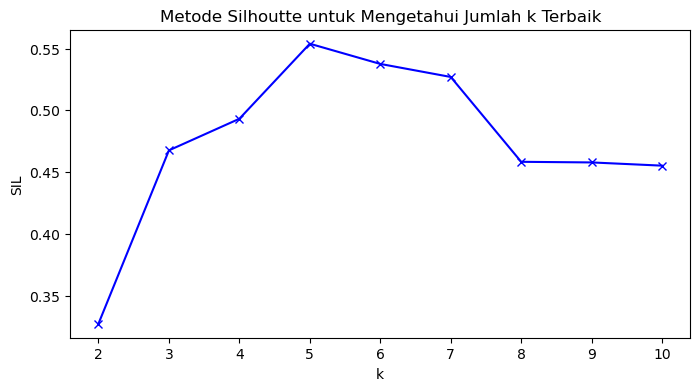

In [125]:
# Optimalisasi K dengan silhouette
from sklearn.metrics import silhouette_score

sil = []
kmax = 10
K = range(2, kmax+1)

for k in K:
  kmeans = KMeans(n_clusters = k,n_init=10).fit(df_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_train, labels, metric = 'euclidean'))

plt.figure(figsize=(8,4))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("SIL")
plt.title("Metode Silhoutte untuk Mengetahui Jumlah k Terbaik")
plt.show()

Dengan menggunakaan metode silhoutter mendapatkan k=5 untuk k yang paling optimal

**Retrain Model dengan optimal k**

In [126]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=5,n_init=10)

y_kmeans = cl_kmeans.fit_predict(df_train)

**Visualisasi Klustering**

Text(0, 0.5, 'Spending Score')

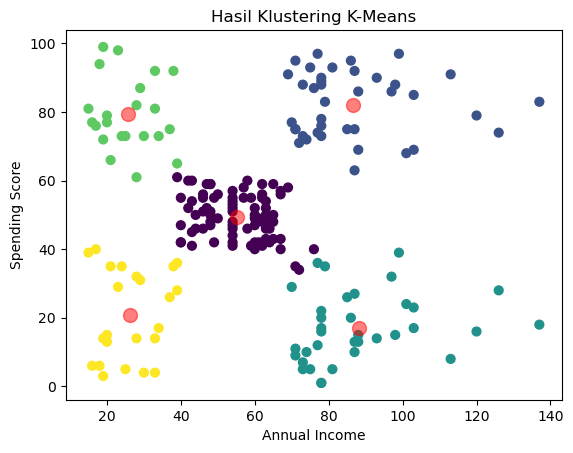

In [131]:
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s = 40, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")